**For the datset:**
https://www.kaggle.com/datasets/yasserh/housing-prices-dataset/discussion?sort=hotness

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv('Housing.csv')
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [43]:
df.shape

(545, 13)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [45]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [46]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

**Observation**
- This Dataset doesn't contain any null values

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


- Let's convert the categorical columns into numerical numericaal columns

In [48]:
df['mainroad'].unique()

array(['yes', 'no'], dtype=object)

In [49]:
df=pd.get_dummies(data=df,columns=['mainroad'],drop_first=True)

In [50]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus', 'mainroad_yes'],
      dtype='object')

In [51]:
df['mainroad_yes']=df['mainroad_yes'].map({True:1,False:0})

In [52]:
df.head(2)

,price,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,mainroad_yes
0,13300000,7420,4,2,3,no,no,no,yes,2,yes,furnished,1
1,12250000,8960,4,4,4,no,no,no,yes,3,no,furnished,1


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   guestroom         545 non-null    object
 6   basement          545 non-null    object
 7   hotwaterheating   545 non-null    object
 8   airconditioning   545 non-null    object
 9   parking           545 non-null    int64 
 10  prefarea          545 non-null    object
 11  furnishingstatus  545 non-null    object
 12  mainroad_yes      545 non-null    int64 
dtypes: int64(7), object(6)
memory usage: 55.5+ KB


In [54]:
df['guestroom'].unique()

array(['no', 'yes'], dtype=object)

In [55]:
df = pd.get_dummies(data=df,columns=['guestroom'],drop_first=True)


In [56]:
df['guestroom_yes'] = df['guestroom_yes'].map({True:1,False:0})
df.head(5)

,price,area,bedrooms,bathrooms,stories,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,mainroad_yes,guestroom_yes
0,13300000,7420,4,2,3,no,no,yes,2,yes,furnished,1,0
1,12250000,8960,4,4,4,no,no,yes,3,no,furnished,1,0
2,12250000,9960,3,2,2,yes,no,no,2,yes,semi-furnished,1,0
3,12215000,7500,4,2,2,yes,no,yes,3,yes,furnished,1,0
4,11410000,7420,4,1,2,yes,no,yes,2,no,furnished,1,1


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   basement          545 non-null    object
 6   hotwaterheating   545 non-null    object
 7   airconditioning   545 non-null    object
 8   parking           545 non-null    int64 
 9   prefarea          545 non-null    object
 10  furnishingstatus  545 non-null    object
 11  mainroad_yes      545 non-null    int64 
 12  guestroom_yes     545 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 55.5+ KB


In [58]:
df['basement'].unique()

array(['no', 'yes'], dtype=object)

In [59]:
df = pd.get_dummies(data=df,columns=['basement'],drop_first=True)
df['basement_yes'] = df['basement_yes'].map({True:1,False:0})
df.head(5)

,price,area,bedrooms,bathrooms,stories,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,mainroad_yes,guestroom_yes,basement_yes
0,13300000,7420,4,2,3,no,yes,2,yes,furnished,1,0,0
1,12250000,8960,4,4,4,no,yes,3,no,furnished,1,0,0
2,12250000,9960,3,2,2,no,no,2,yes,semi-furnished,1,0,1
3,12215000,7500,4,2,2,no,yes,3,yes,furnished,1,0,1
4,11410000,7420,4,1,2,no,yes,2,no,furnished,1,1,1


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   hotwaterheating   545 non-null    object
 6   airconditioning   545 non-null    object
 7   parking           545 non-null    int64 
 8   prefarea          545 non-null    object
 9   furnishingstatus  545 non-null    object
 10  mainroad_yes      545 non-null    int64 
 11  guestroom_yes     545 non-null    int64 
 12  basement_yes      545 non-null    int64 
dtypes: int64(9), object(4)
memory usage: 55.5+ KB


In [62]:
features = ['hotwaterheating','airconditioning','prefarea','furnishingstatus']
for feature in features:
    print(f"Name of the feature {feature}")
    print(df[feature].unique(),'\n')

Name of the feature hotwaterheating
['no' 'yes'] 

Name of the feature airconditioning
['yes' 'no'] 

Name of the feature prefarea
['yes' 'no'] 

Name of the feature furnishingstatus
['furnished' 'semi-furnished' 'unfurnished'] 



In [64]:
df = pd.get_dummies(data=df,columns=['hotwaterheating','airconditioning','prefarea'],drop_first=True)

In [65]:
df = df.replace({True:1,False:0})
df.head(5)

C:\Users\Paul\AppData\Local\Temp\ipykernel_12480\3168739978.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True:1,False:0})


,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,4,2,3,2,furnished,1,0,0,0,1,1
1,12250000,8960,4,4,4,3,furnished,1,0,0,0,1,0
2,12250000,9960,3,2,2,2,semi-furnished,1,0,1,0,0,1
3,12215000,7500,4,2,2,3,furnished,1,0,1,0,1,1
4,11410000,7420,4,1,2,2,furnished,1,1,1,0,1,0


In [66]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

C:\Users\Paul\AppData\Local\Temp\ipykernel_12480\1089230974.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df.price[(df.furnishingstatus=='furnished')],color='Red',shade=True)


C:\Users\Paul\AppData\Local\Temp\ipykernel_12480\1089230974.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df.price[(df.furnishingstatus=='semi-furnished')],color='Blue',shade=True)
C:\Users\Paul\AppData\Local\Temp\ipykernel_12480\1089230974.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df.price[(df.furnishingstatus=='unfurnished')],color='green',shade=True)


Text(0.5, 1.0, 'Price by Furniture Status')

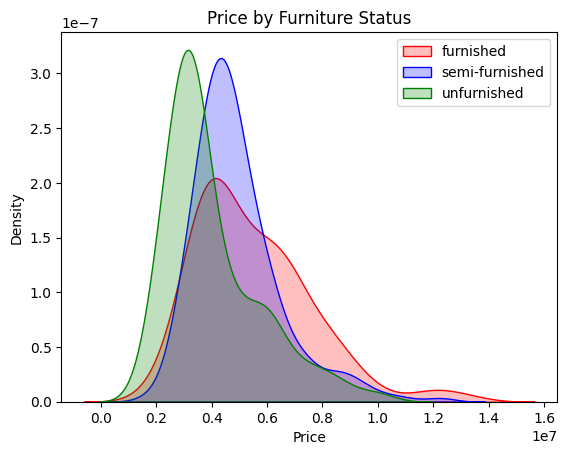

In [68]:
Tot = sns.kdeplot(df.price[(df.furnishingstatus=='furnished')],color='Red',shade=True)
Tot = sns.kdeplot(df.price[(df.furnishingstatus=='semi-furnished')],color='Blue',shade=True)
Tot = sns.kdeplot(df.price[(df.furnishingstatus=='unfurnished')],color='green',shade=True)
Tot.legend(["furnished","semi-furnished","unfurnished"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Price')
Tot.set_title('Price by Furniture Status')

<Axes: xlabel='furnishingstatus', ylabel='price'>

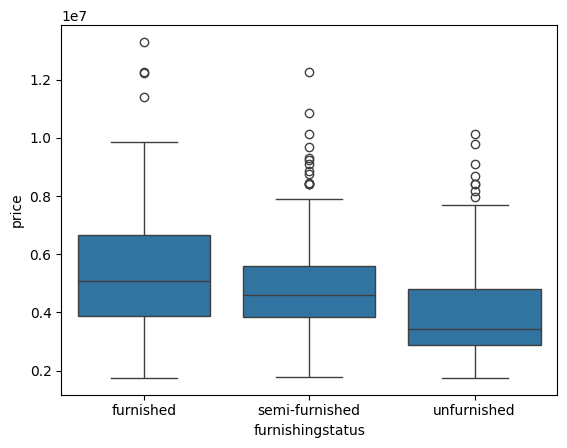

In [70]:
sns.boxplot(data=df,x='furnishingstatus',y='price')

**Observation:**

- Furnishingstatus has many price outliers in each category of furnishing status
- Houses with furnishing has *more price* when compared to semi furnished and unfurnished, and semi furnished houses has more price when compared to unfurnished

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   price                545 non-null    int64 
 1   area                 545 non-null    int64 
 2   bedrooms             545 non-null    int64 
 3   bathrooms            545 non-null    int64 
 4   stories              545 non-null    int64 
 5   parking              545 non-null    int64 
 6   furnishingstatus     545 non-null    object
 7   mainroad_yes         545 non-null    int64 
 8   guestroom_yes        545 non-null    int64 
 9   basement_yes         545 non-null    int64 
 10  hotwaterheating_yes  545 non-null    int64 
 11  airconditioning_yes  545 non-null    int64 
 12  prefarea_yes         545 non-null    int64 
dtypes: int64(12), object(1)
memory usage: 55.5+ KB


In [ ]:
df = pd.get_dummies(data=df,columns=['furnishingstatus'],drop_first=True)

In [74]:
df.head(5)

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,False,False
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,False,False
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,True,False
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,False,False
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,False,False


In [75]:
df.replace({True:1,False:0})

C:\Users\Paul\AppData\Local\Temp\ipykernel_12480\2379529422.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({True:1,False:0})


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


### Numerical Analysis

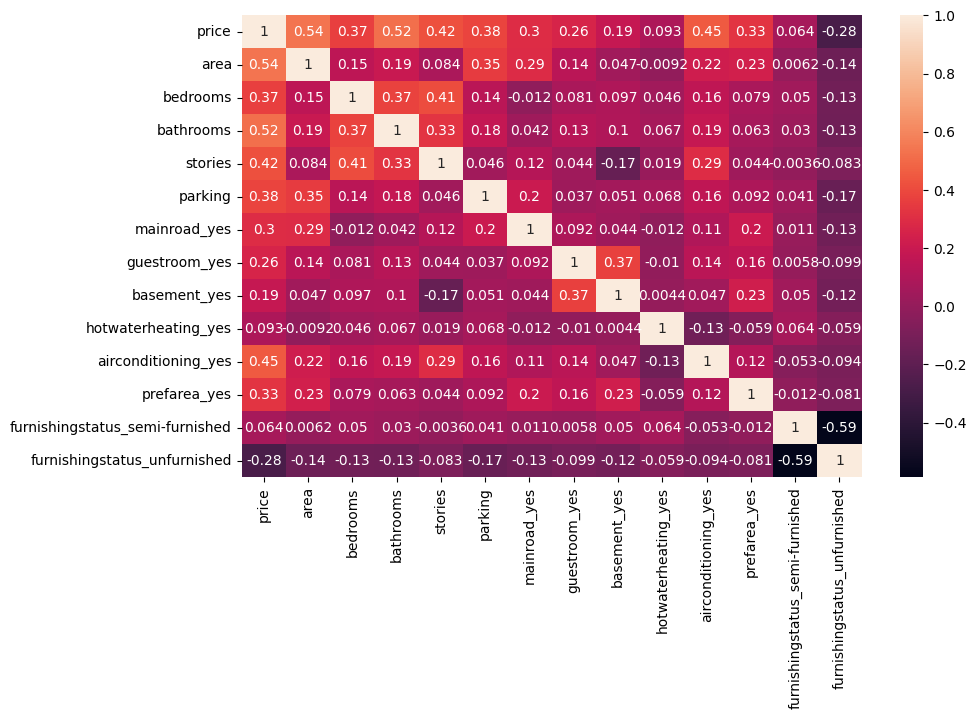

In [78]:
plt.figure(figsize=(10,6),)
_= sns.heatmap(df.corr(),annot=True)

<Axes: >

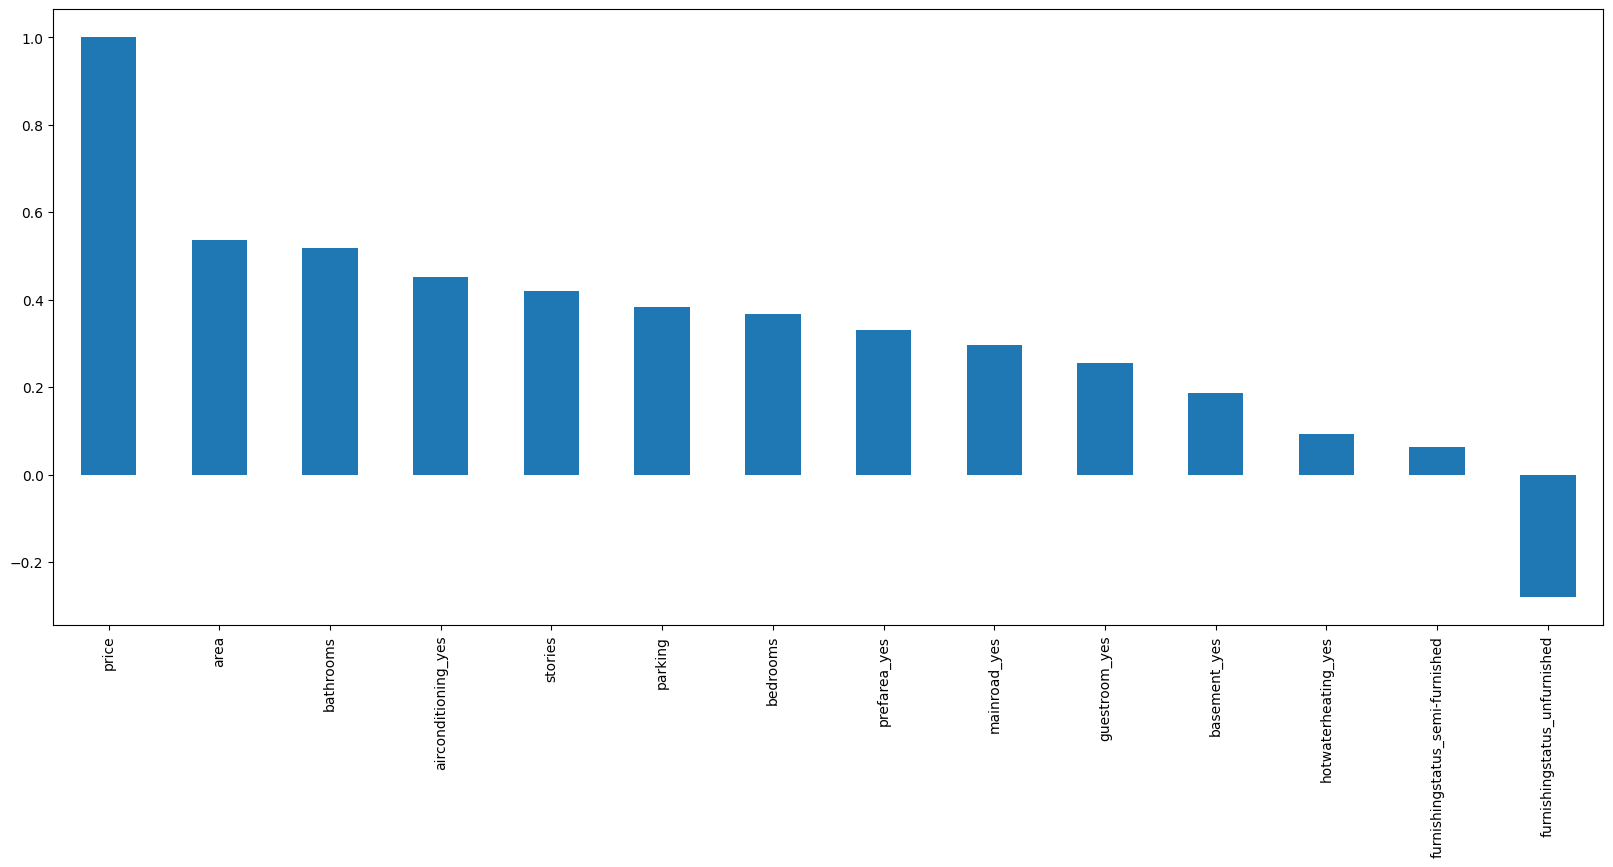

In [80]:
plt.figure(figsize=(20,8))
df.corr()['price'].sort_values(ascending=False).plot(kind='bar')

**Observation**
- Area of the House, No of bathromms is highly positively correlated to house price

<Axes: xlabel='area', ylabel='price'>

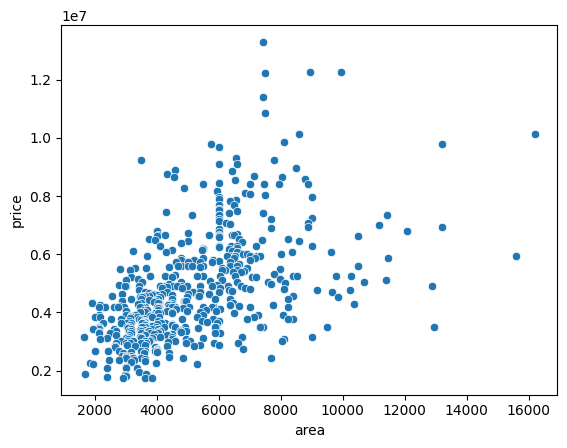

In [81]:
sns.scatterplot(x='area',y='price',data=df)

- As the area increases price of the house increases... i.e +vely correlated

In [82]:
df['bathrooms'].value_counts()

bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64

- Here the Bathrooms is a numerical data but it comes under categorical data

C:\Users\Paul\AppData\Local\Temp\ipykernel_12480\3733610615.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:r'` for the same effect.

  _=sns.boxplot(data=df,x='price',hue='bathrooms',color='r')


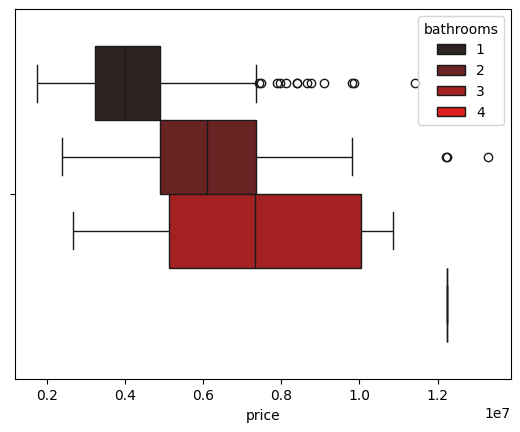

In [84]:
_=sns.boxplot(data=df,x='price',hue='bathrooms',color='r')

**Observation:**
- As the no of bathrooms increases *price* of the House increases

In [90]:
df['bedrooms'].value_counts()

bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64

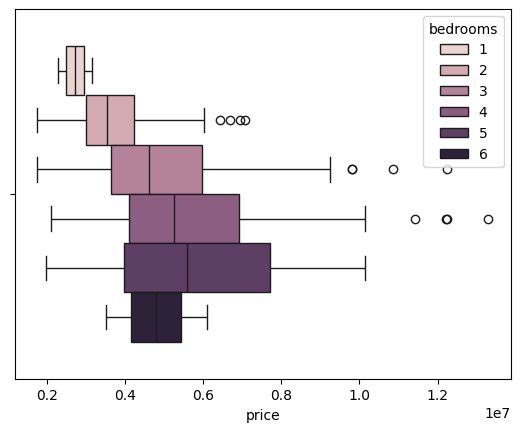

In [93]:
_=sns.boxplot(data=df,x='price',hue='bedrooms')

**Observation:**
- Houses with more bedrooms has more price but in contast houses with 6 bedrooms has some what less price

In [86]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [95]:
df.stories.value_counts()

stories
2    238
1    227
4     41
3     39
Name: count, dtype: int64

C:\Users\Paul\AppData\Local\Temp\ipykernel_12480\1794133039.py:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:r'` for the same effect.

  sns.boxplot(data=df,x='price',hue=feature,color='r')
C:\Users\Paul\AppData\Local\Temp\ipykernel_12480\1794133039.py:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:r'` for the same effect.

  sns.boxplot(data=df,x='price',hue=feature,color='r')
C:\Users\Paul\AppData\Local\Temp\ipykernel_12480\1794133039.py:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:r'` for the same effect.

  sns.boxplot(data=df,x='price',hue=feature,color='r')
C:\Users\Paul\AppData\Local\Temp\ipykernel_12480\1794133039.py:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:r'` f

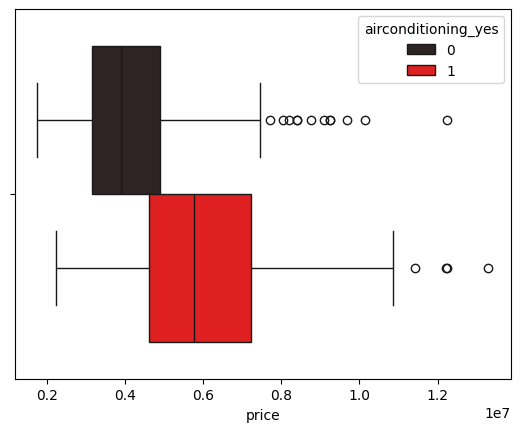

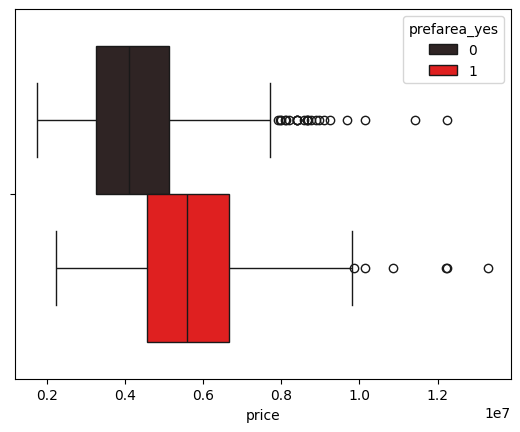

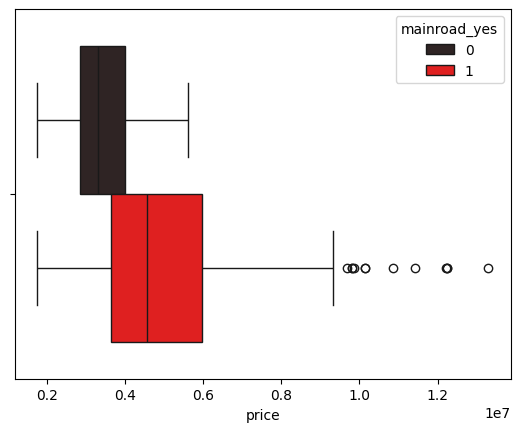

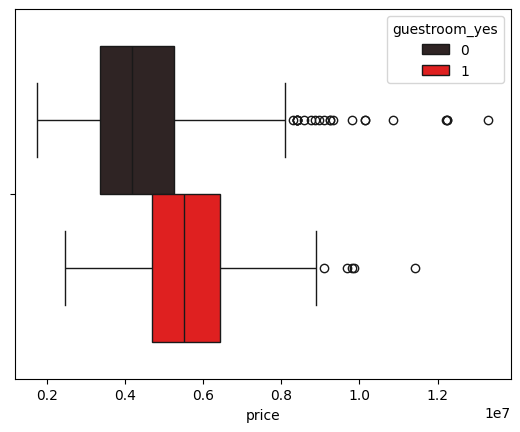

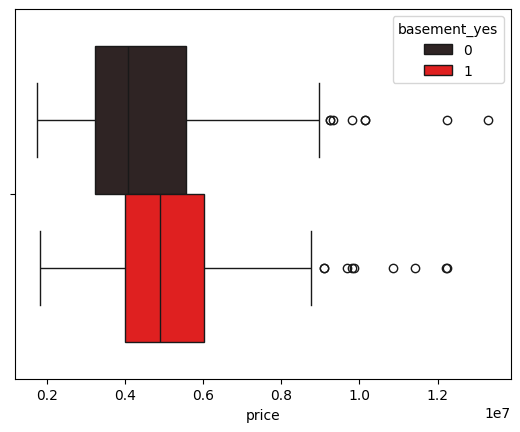

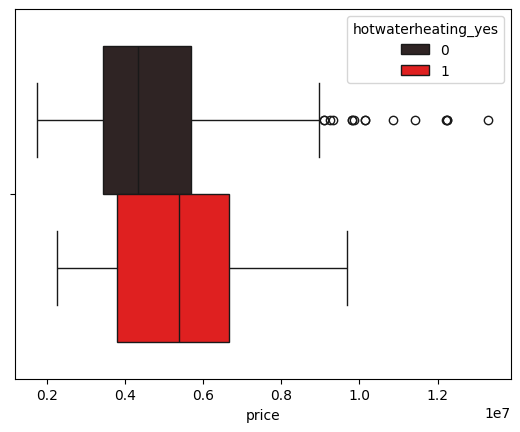

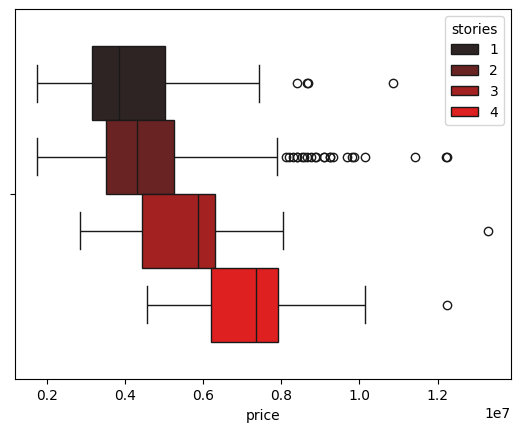

In [96]:
features = ['airconditioning_yes','prefarea_yes','mainroad_yes','guestroom_yes','basement_yes','hotwaterheating_yes','stories']
for feature in features:
    plt.subplots()
    sns.boxplot(data=df,x='price',hue=feature,color='r')

**Observation:**
- Features like hotwaterheating, basement are doesn't showing more impact on House price, whereas remainig features show impact in the price of the house

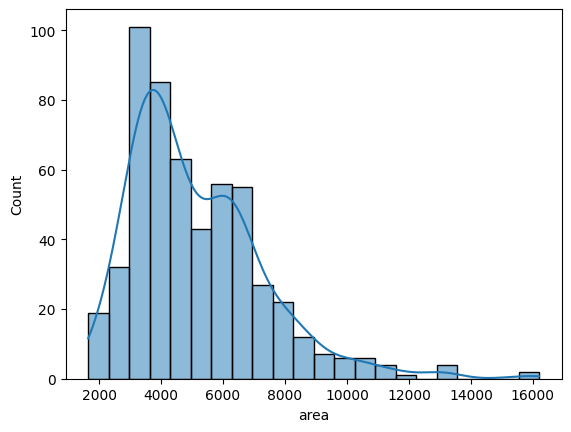

In [97]:
_=sns.histplot(data=df,x='area',kde=True)

In [99]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
new_df = pd.DataFrame(df,columns=['area'])
normalized_df = scalar.fit_transform(new_df)
print(normalized_df)

[[0.39656357]
 [0.5024055 ]
 [0.57113402]
 [0.40206186]
 [0.39656357]
 [0.40206186]
 [0.47628866]
 [1.        ]
 [0.44329897]
 [0.28178694]
 [0.79381443]
 [0.29896907]
 [0.33676976]
 [0.12714777]
 [0.42268041]
 [0.29896907]
 [0.34020619]
 [0.47079038]
 [0.20274914]
 [0.32783505]
 [0.18350515]
 [0.37835052]
 [0.43986254]
 [0.2       ]
 [0.49140893]
 [0.33608247]
 [0.29896907]
 [0.49656357]
 [0.43298969]
 [0.26460481]
 [0.40034364]
 [0.36769759]
 [0.22199313]
 [0.29621993]
 [0.35670103]
 [0.36769759]
 [0.40082474]
 [0.50515464]
 [0.29896907]
 [0.29896907]
 [0.33676976]
 [0.32371134]
 [0.33195876]
 [0.29896907]
 [0.29896907]
 [0.29896907]
 [0.29896907]
 [0.34020619]
 [0.18213058]
 [0.39793814]
 [0.39793814]
 [0.32130584]
 [0.29896907]
 [0.24054983]
 [0.29896907]
 [0.29896907]
 [0.67285223]
 [0.50515464]
 [0.41443299]
 [0.29896907]
 [0.29896907]
 [0.49690722]
 [0.31546392]
 [0.32371134]
 [0.65463918]
 [0.49690722]
 [0.79381443]
 [0.41580756]
 [0.29896907]
 [0.71752577]
 [0.16151203]
 [0.29

In [100]:
df['normalized_area'] = normalized_df
df.head(5)

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,normalized_area
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,False,False,0.396564
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,False,False,0.502405
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,True,False,0.571134
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,False,False,0.402062
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,False,False,0.396564


In [102]:
df = df.replace({True:1,False:0})

C:\Users\Paul\AppData\Local\Temp\ipykernel_12480\191794746.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True:1,False:0})


In [103]:
df.head(5)

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,normalized_area
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0,0.396564
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0,0.502405
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0,0.571134
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0,0.402062
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0,0.396564


In [104]:
df.drop(columns=['area'],axis=1,inplace=True)

In [105]:
df.head()

,price,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,normalized_area
0,13300000,4,2,3,2,1,0,0,0,1,1,0,0,0.396564
1,12250000,4,4,4,3,1,0,0,0,1,0,0,0,0.502405
2,12250000,3,2,2,2,1,0,1,0,0,1,1,0,0.571134
3,12215000,4,2,2,3,1,0,1,0,1,1,0,0,0.402062
4,11410000,4,1,2,2,1,1,1,0,1,0,0,0,0.396564


**Now our dataset is ready to train any Machine Learning Model**